# Lição 5
Aluno: Samuel Nogueira Bacelar
<br/>
Matrícula: 180130722

Nesta lição do FastAI o Jeremy ensina como fazer um modelo linear de predição, com essa ideia em mente este notebook tem como objetivo criar um modelo para prever a cancer de mama, utlizando como base um Dataset do Kaggle, o Breast cancer wisconsin data.


Um modelo linear é um tipo de modelo de predição que pode ser usado para realizar classificação ou regressão. Ele é chamado de "linear" porque a relação entre as variáveis de entrada (características) e a variável de saída (alvo) é representada por uma equação linear. Os modelos lineares podem ter dificuldades em lidar com problemas que exigem uma relação não linear entre as variáveis de entrada e saída. 


Para iniciarmos devemos importar algumas bibliotecas que serão utilizadas durante o desenvolvimento. Os principais são Pandas e algumas funcionalidades do Sklearn.

In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [53]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,...,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,...,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,...,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,...,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,...,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,...,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,...,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,...,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,...,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,...,0.9387,0.2650,0.4087,0.12400,NaN


Por haver muitas colunas para serem representadas no dataset iremos mostrar todas as colunas com o comando abaixo

In [54]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Iremos remover algumas colunas que não nos interessam para a tarefa

In [55]:
df = df.drop(labels=['id', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


Após importar o Dataset do Kaggle, podemos ver que é uma tabela pequena com apenas 33 colunas e 569 linhas, 30 dessas colunas indicam caracteristicas do tecido das mamas. A coluna `diagnosis` indica qual é o diagnóstico dado para o tumor correspondente, sendo M=Malígno e B=Benígno. 

In [56]:
pd.options.display.max_columns = df.shape[1]
df.describe(include=[np.number])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


A partir dos dados mostrados na descrição do nosso dataframe podemos notar que há uma faixa de valor grande em algumas colunas. Um exemplo disso é o `area_mean` onde 75% dos valores é de até 782,7 mas o valor máximo é de 2501. Assim é necessário tratar os valores dessa e outras colunas com características similares para atenuar os valores e aumentar a capacidade de predição do modelo.

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>],
       [<Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>],
       [<Axes: title={'center': 'fractal_dimension_mean'}>, <Axes: >,
        <Axes: >]], dtype=object)

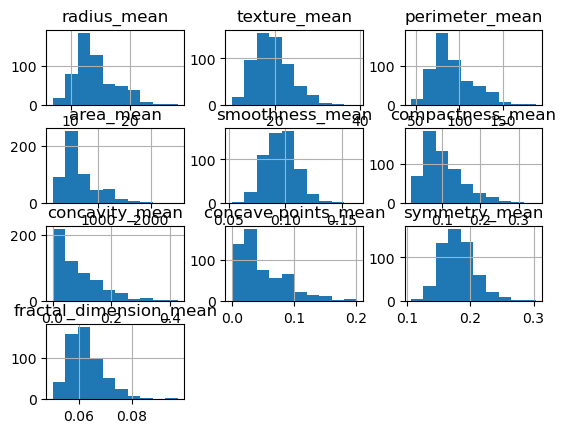

In [57]:
df.hist()

Aplicaremos então a função `np.log` afim de facilitar o treinamento e evitar que, durante a múltiplicação de coeficientes os dados maiores não tenham um peso absurdamente maior como poderia acontecer ao manter os dados originais.

In [58]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [79]:
np.log(10000)

9.210340371976184

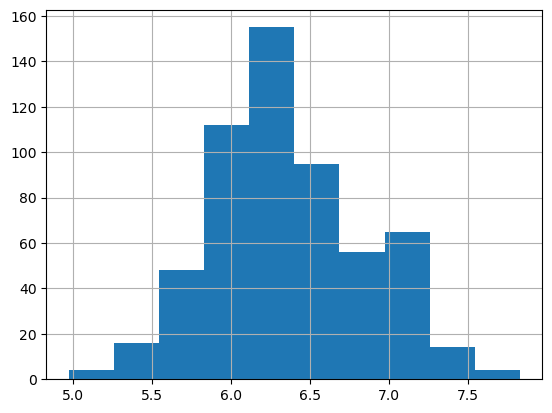

In [59]:
columns_to_transform = ['area_mean']
df_with_logs = df.copy()
for column_to_transform in columns_to_transform:
    new_column_log = 'log_'+column_to_transform
    df_with_logs[new_column_log] = np.log(df[column_to_transform]+1)
    df_with_logs = df_with_logs.drop([column_to_transform], axis=1)
df_with_logs['log_area_mean'].hist();

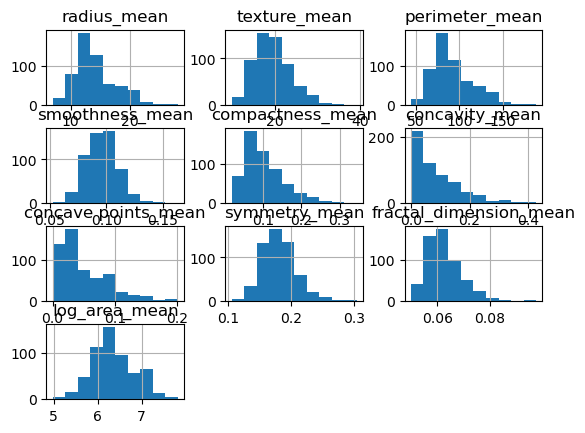

In [60]:
df_with_logs.hist();

In [75]:
df_with_logs.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,log_area_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,6.365109
std,0.483918,3.524049,4.301036,24.298981,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.482274
min,0.000000,6.981000,9.710000,43.790000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,4.973280
25%,0.000000,11.700000,16.170000,75.170000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,6.043345
50%,1.000000,13.370000,18.840000,86.240000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,6.313729
75%,1.000000,15.780000,21.800000,104.100000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,6.664026
max,1.000000,28.110000,39.280000,188.500000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,7.824846


Com relaçao ao campo `diagnosis` podemos ver que o total diagnósticos de tumores **Benígnos** é maior que o total de diagnósticos de tumores **Malígnos**.

<Axes: >

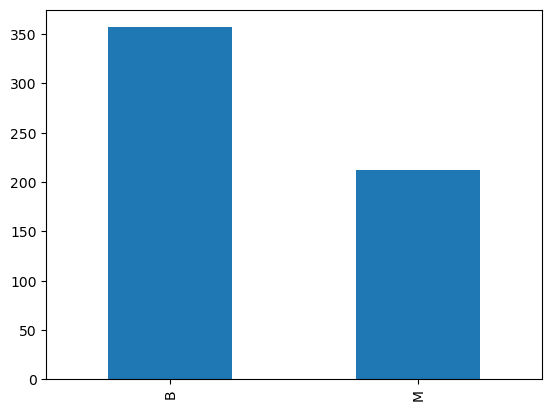

In [61]:
df_with_logs['diagnosis'].value_counts().plot.bar()

Mais precisamente temos 62,74% dos dados classificados como benígnos e 37,26% como Malígnos. Podemos então afirmar que há um conjunto desbalanceado de dados.

In [62]:
diagnosisPercentage = 100 * (df_with_logs['diagnosis'].value_counts() / len(df_with_logs.index))
diagnosisPercentage

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

Iremos remover a coluna `Unnamed: 32`

Outro importante passo para o tratamento de dados é o de eliminar dados marcados como NaN, para analisar onde deve ser feito esse tipo de tratamento iremos observar quais colunas possuem algum valor nulo.

In [63]:
df_with_logs.isna().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
log_area_mean             0
dtype: int64

Como podemos ver os dados da tabela oferecida pelo Kaggle não possuem nenhum valor nulo, então podemos seguir em frente.


O próximo passo é o de criar os dados de treinamento e de teste, para isso basta usar o método train_test_split que irá receber o Dataset sem a coluna `diagnosis` e a coluna `diagnosis` em si separadamente. Em seguida irá retornar os dados que serão usados no treinamento e nos testes do modelo.

In [64]:
df_with_logs['diagnosis'] = df_with_logs['diagnosis'].apply(lambda x: 1 if x == 'B' else 0)
df_with_logs['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [65]:
X = df_with_logs.drop(columns='diagnosis')
y = df_with_logs['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

O modelo que irei utilizar será o Random Forest Generator. O Random Forest é um algoritmo de aprendizado supervisionado que cria uma série de árvores de decisão e, em seguida, combina suas previsões para obter uma predição final mais precisa. 


**Arvore de decisão:** Uma árvore de decisão é um modelo de aprendizado de máquina que é usado para fazer previsões em problemas de classificação ou regressão. Ela funciona criando uma série de perguntas lógicas sobre os dados de entrada, onde cada pergunta é representada por um nó na árvore. A árvore é construída a partir da raiz, onde cada pergunta é feita até chegar a uma folha, que representa a previsão final.

In [66]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Após treinado o modelo podemos fazer um teste com dados aleátorios e podemos ver que retorna um valor que representaria a qualidade do vinho.
Agora iremos testar com o Dataset teste criado, isso irá permitir uma melhor interpretação da qualidade do modelo criado.

In [78]:
df_with_logs.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'log_area_mean'],
      dtype='object')

In [77]:
X_test.iloc[0]

radius_mean               12.47000
texture_mean              18.60000
perimeter_mean            81.09000
smoothness_mean            0.09965
compactness_mean           0.10580
concavity_mean             0.08005
concave points_mean        0.03821
symmetry_mean              0.19250
fractal_dimension_mean     0.06373
log_area_mean              6.17981
Name: 204, dtype: float64

In [72]:
y_pred = model.predict(X_test)
y_pred

array([1.  , 0.  , 0.04, 1.  , 1.  , 0.  , 0.  , 0.37, 0.27, 0.99, 0.93,
       0.  , 0.85, 0.  , 1.  , 0.02, 0.97, 1.  , 1.  , 0.  , 0.9 , 1.  ,
       0.  , 1.  , 0.98, 0.87, 1.  , 0.78, 0.99, 0.  , 0.86, 1.  , 1.  ,
       1.  , 1.  , 1.  , 0.12, 0.99, 0.  , 0.85, 1.  , 0.03, 0.99, 1.  ,
       0.55, 1.  , 0.99, 0.99, 1.  , 1.  , 0.  , 0.  , 0.39, 0.87, 1.  ,
       0.98, 1.  , 0.  , 0.41, 1.  , 1.  , 0.  , 0.  , 0.92, 1.  , 0.9 ,
       0.  , 0.  , 1.  , 1.  , 0.04, 0.  , 0.92, 0.  , 0.98, 0.91, 1.  ,
       0.51, 1.  , 0.91, 0.05, 1.  , 0.85, 0.  , 0.22, 0.  , 0.11, 0.02,
       0.8 , 1.  , 1.  , 1.  , 0.1 , 0.99, 0.99, 1.  , 0.  , 0.  , 1.  ,
       0.  , 0.36, 1.  , 0.08, 0.  , 0.98, 1.  , 0.83, 0.  , 0.75, 0.97,
       0.  , 1.  , 0.71, 0.  ])

Após utilizado os dados de teste para fazer as suas predições podemos verificar o error do modelo nesses dados, para isso será utilizado o y_test, o y_pred para encontrar o mean squared error. Ele faz isso comparando os valores reais (y_test), dos valores previstos (y_pred). 


A escolha do MSE ao invés do MAE foi pelo fato do MSE conseguir descrever melhor os dados, apesar de ser mais sensível a grandes variações de dados que o MAE, o MSE consegue demonstrar de maneira mais simples o comportamento do modelo, e como o DataSet utilizado não possue variações muito grandes dos dados acredito que irá se encaixar melhor no meu modelo. 

In [68]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.04


In [69]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 0.08


Por fim exportamos nosso modelo e o disponibilizamos no [huggingface](https://huggingface.co/spaces/SamuelNog/licao_5). Ele apenas obtem uma série de inputs e retorna uma estimativa entre 0 e 1. Quanto mais próximo de 1, maior a chance do tumor ser Benígno e quanto mais próximo de 0 maior a chance de ser Malígno.

In [70]:
import pickle

# Carregar o modelo treinado
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)